<a href="https://colab.research.google.com/github/alessandronascimento/BioMolComp/blob/main/P10/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de Dados de Reconhecimento de Dígitos MNIST

O MNIST é um conjunto de dados padrão em treinamento de modelos de aprendizagem de máquina que visa reconhecer corretamente dígitos manuscritos como os mostrados na imagem abaixo.

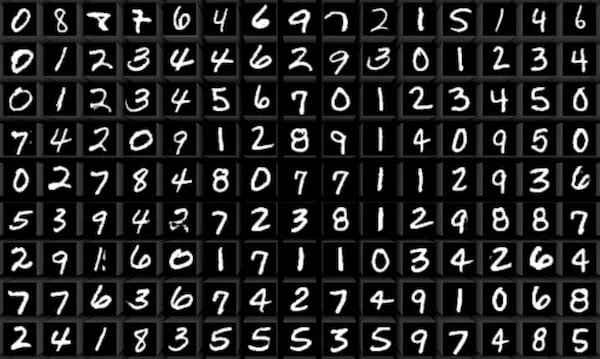

Nesta primeira etapa, vamos treinar um modelo de uma *rede neural* para reconhecer dígitos manuscritos do conjunto MNIST.

Para esta finalidade, usaremos um modelo de rede neural conhecido como *Convolutional Neural Network* (CNN). O modelo é inspirado no cortex visual felino. Estudos realizados entre os anos 50-80 demonstraram que a visão é processada em uma série de camadas.

Cada neurônio da primeira cadama recebe o input de uma pequena região do campo visual. Diferentes neurônios são especializados em detectar padrões locar ou características, como linhas verticais ou horizontais.

Células da segunda camada recebem o input de clusters locais de células da primeira camada, combinam seus sinais para detectar padrões mais complexos em um campo visual maior. Cada camada pode ser vista como uma nova representação da imagem original, descrita em termos de padrões maiores e mais abstratos que a camada anterior.

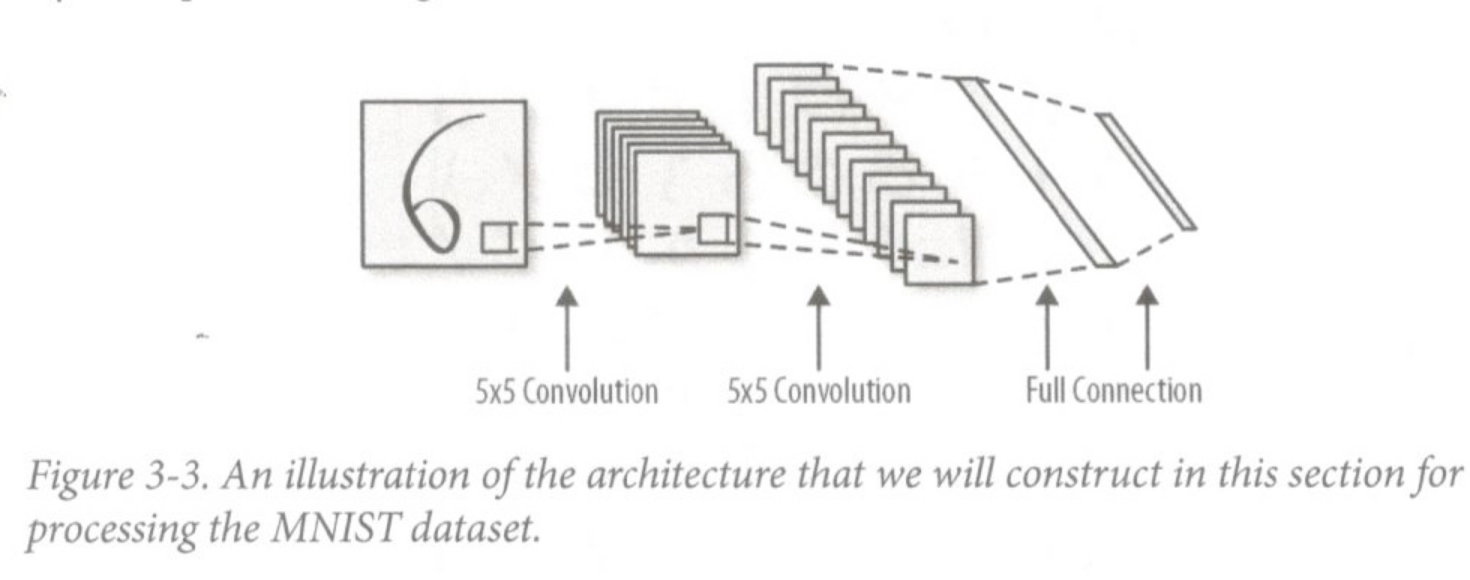

In [ ]:
# Instalando as bibliotecas necessárias e checando a GPU

!pip3 install deepchem
import deepchem as dc
import tensorflow as tf
import tensorflow.keras.layers as layers

!nvidia-smi

In [ ]:
# Carregando o conjunto de dados e criando o one-hot encode

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
y_train = tf.one_hot(y_train, 10).numpy()
y_test = tf.one_hot(y_test, 10).numpy()
train_dataset = dc.data.NumpyDataset(x_train, y_train)
test_dataset = dc.data.NumpyDataset(x_test, y_test)

Vamos checar o conjunto de dados:

In [ ]:
train_dataset

In [ ]:
test_dataset

O MNIST contém imagens de tamanho 28 x 28. Esta combinação resulta em um vetor (achatado) de 784 elementos.

O valor conhecido do dígito pode ser representado em um vetor de 10 elementos, uma vez que existem 10 dígitos possíveis. Esta representação (*one-hot enconded*) gera um vetor com um elemento recebendo o valor 1 e os demais 0. Por exemplo, o dígito 9 é presentado com um vetor contendo o valor de 1 na 9.a posição e as demais posições contendo o valor 0.

In [4]:
# Definindo a arquitetura do modelo

features = tf.keras.Input(shape=(28, 28, 1))
conv2d_1 = layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu)(features)
conv2d_2 = layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu)(conv2d_1)
flatten = layers.Flatten()(conv2d_2)
dense1 = layers.Dense(units=1024, activation=tf.nn.relu)(flatten)
dense2 = layers.Dense(units=10, activation=None)(dense1)
output = layers.Activation(tf.math.softmax)(dense2)
keras_model = tf.keras.Model(inputs=features, outputs=[output, dense2])
model = dc.models.KerasModel(
    keras_model,
    loss=dc.models.losses.SoftmaxCrossEntropy(),
    output_types=['prediction', 'loss'],
    model_dir='mnist')

Uma vez que desejamos construir uma rede neural CNN 2D, precisamos definir que o input é uma imagem (matriz 2D) e não um vetor. A linha

```
features = tf.keras.Input(shape=(28, 28, 1))
```
se destina a esta finalidade.

Em seguida, a classe *Conv2D* aplica uma convolução 2D em cada amostra do input e passa por uma função de ativação do tipo ReLU.

Finalmente, uma rede densa (totalmente conectada) recebe os dados das camadas iniciais para gerar um output final que contém inicialmente 1024 valores por amostra (*dense1*) e, em seguida, os 10 valores esperados (*dense2*).

A função de perda é a *SoftMaxCrossEntropy*. A funcão *SoftMax* função converte valores arbitrários em uma distribuição de probabilidade:

$\sigma_i(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}$

A função *SoftMaxCrossEntropy* calcula a função *SoftMax* e em seguida calcula a entropia cruzada das probabilidades com os labels, gerando algo similar a uma distribuição de probabilidades.


In [ ]:
# Treinamento do modelo

model.fit(train_dataset, nb_epoch=10)

Finalmente, vamos treinar o modelo e, seguida (abaixo), avaliar como o modelo se sai.

In [ ]:
# Avaliação do modelo

metric = dc.metrics.Metric(dc.metrics.accuracy_score)
train_scores = model.evaluate(train_dataset, [metric])
test_scores = model.evaluate(test_dataset, [metric])
print(train_scores)
print(test_scores)